In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [98]:
#dataset
df = pd.read_csv("Dataset Heart Disease.csv")

In [99]:
df.head()

,Unnamed: 0,age,sex,chest pain type,resting bps,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,0,40,1,2,140,289.0,0,0,172,0,0.0,1,0
1,1,49,0,3,160,180.0,0,0,156,0,1.0,2,1
2,2,37,1,2,130,283.0,0,1,98,0,0.0,1,0
3,3,48,0,4,138,214.0,0,0,108,1,1.5,2,1
4,4,54,1,3,150,195.0,0,0,122,0,0.0,1,0


In [100]:
#remove unnamed columns
df.drop("Unnamed: 0",axis = 1,  inplace = True)

In [101]:
#data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1048 non-null   int64  
 1   sex                  1048 non-null   int64  
 2   chest pain type      1048 non-null   int64  
 3   resting bps          1048 non-null   int64  
 4   cholesterol          1048 non-null   float64
 5   fasting blood sugar  1048 non-null   int64  
 6   resting ecg          1048 non-null   int64  
 7   max heart rate       1048 non-null   int64  
 8   exercise angina      1048 non-null   int64  
 9   oldpeak              1048 non-null   float64
 10  ST slope             1048 non-null   int64  
 11  target               1048 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 98.4 KB


In [102]:
#check null values
df.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bps            0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [103]:
#check duplicates
df.duplicated().sum()

0

In [104]:
#descriptive summary
df.describe()

,age,sex,chest pain type,resting bps,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000
mean,53.325382,0.734733,2.817748,132.613550,245.172710,0.162214,0.606870,142.918893,0.368321,0.942366,1.532443,0.496183
std,9.397822,0.441686,1.118649,17.367605,57.101359,0.368823,0.763313,24.427115,0.482579,1.100429,0.611023,0.500224
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,69.000000,0.000000,-0.100000,0.000000,0.000000
25%,46.000000,0.000000,2.000000,120.000000,208.000000,0.000000,0.000000,125.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,3.000000,130.000000,239.000000,0.000000,0.000000,144.000000,0.000000,0.600000,2.000000,0.000000
75%,60.000000,1.000000,4.000000,140.000000,275.000000,0.000000,1.000000,162.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [105]:
#independent and dependent variable
X= df.iloc[:,:-1]
y = df.iloc[:,-1]

In [106]:
#split the data into training data and testing data

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 0.30, random_state=42)

In [107]:
X_train.shape

(733, 11)

In [108]:
X_test.shape

(315, 11)

In [109]:
#create logistic regression model
log_reg = LogisticRegression()

In [110]:
log_reg.fit(X_train,y_train)

LogisticRegression()

In [111]:
y_pred =log_reg.predict(X_test)

In [112]:
y_pred

array([0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,

In [113]:
# Calculate accuracy
accuracy = accuracy_score(y_pred,y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7746031746031746


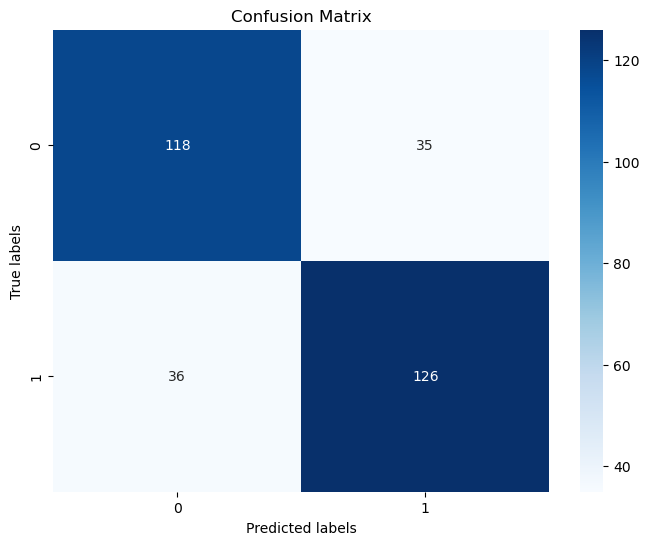

In [114]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [115]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77       153
           1       0.78      0.78      0.78       162

    accuracy                           0.77       315
   macro avg       0.77      0.77      0.77       315
weighted avg       0.77      0.77      0.77       315



In [119]:
# Define a parameter grid to search
param_grid = {
    'penalty': ['l1', 'l2',"elasticNet",None],             # Type of regularization ('l1' or 'l2')
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear'],              # Algorithm to use in optimization problem
    'max_iter': [100, 200, 300],          # Maximum number of iterations
}

In [120]:
# Create GridSearchCV object
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=3, scoring='accuracy')


In [121]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticNet', None],
                         'solver': ['liblinear']},
             scoring='accuracy')

In [122]:
grid_search.best_params_

{'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}

In [129]:
log_reg2 = LogisticRegression(C=10,max_iter=100, penalty='l2', solver='liblinear')

In [130]:
log_reg2.fit(X_train,y_train)

LogisticRegression(C=10, solver='liblinear')

In [131]:
y_pred2 = log_reg2.predict(X_test)

In [132]:
print(confusion_matrix(y_pred2, y_test))
print(accuracy_score(y_pred2, y_test))
print(classification_report(y_pred2,y_test))

[[119  33]
 [ 34 129]]
0.7873015873015873
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       152
           1       0.80      0.79      0.79       163

    accuracy                           0.79       315
   macro avg       0.79      0.79      0.79       315
weighted avg       0.79      0.79      0.79       315

